# HR_Analytics_Job_Change_of_Data_Scientists

## Imports

In [72]:
# Imports
print ("importing........", flush=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks", color_codes=True)
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# pair 2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
# pair 4
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
# pair 5
import xgboost as xgb
from xgboost import plot_importance
print("[Done]")

importing........
[Done]


## Read train-set

In [73]:
df_train = pd.read_csv('aug_train.csv')
df_train.head()
# df_train.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [74]:
df_train.shape

(19158, 14)

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [76]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
enrollee_id,19158,NaN,NaN,NaN,16875.4,9616.29,1,8554.25,16982.5,25169.8,33380
city,19158,123,city_103,4355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,19158,NaN,NaN,NaN,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
gender,14650,3,Male,13221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relevent_experience,19158,2,Has relevent experience,13792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolled_university,18772,3,no_enrollment,13817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,18698,5,Graduate,11598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_discipline,16345,6,STEM,14492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience,19093,22,>20,3286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,13220,8,50-99,3083,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking the Missing Value

In [77]:
df_train.isnull().sum().sort_values(ascending=False)

company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
target                       0
training_hours               0
relevent_experience          0
city_development_index       0
city                         0
enrollee_id                  0
dtype: int64

### Check for Duplicates or unnecessary data 

In [78]:
# The number of duplicates 
df_train.duplicated(subset=None, keep='first').sum()

0

In [79]:
# checking the missing value & test dataset
#fig, ax = plt.subplots( figsize = (15, 8))

# data 
#sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#ax.set_title('Main Data Frame')

## Read test-set

In [80]:
df_test = pd.read_csv('aug_test.csv')
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [81]:
df_test.shape

(2129, 13)

In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [83]:
df_test.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
enrollee_id,2129,NaN,NaN,NaN,16861.6,9576.85,3,8562,16816,25129,33353
city,2129,108,city_103,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,2129,NaN,NaN,NaN,0.824984,0.125074,0.448,0.698,0.903,0.92,0.949
gender,1621,3,Male,1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relevent_experience,2129,2,Has relevent experience,1524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolled_university,2098,3,no_enrollment,1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,2077,5,Graduate,1269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_discipline,1817,6,STEM,1621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience,2124,22,>20,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,1507,8,50-99,338,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking the Missing Value

In [84]:
df_test.isnull().sum().sort_values(ascending=False)

company_type              634
company_size              622
gender                    508
major_discipline          312
education_level            52
last_new_job               40
enrolled_university        31
experience                  5
training_hours              0
relevent_experience         0
city_development_index      0
city                        0
enrollee_id                 0
dtype: int64

### Check for Duplicates or unnecessary data 

In [85]:
# The number of duplicates 
df_test.duplicated(subset=None, keep='first').sum()

0

In [86]:
df_test['city'] = df_test['city'].str.replace('city_','')

In [87]:
# checking the missing value & test dataset
#fig, ax = plt.subplots( figsize = (15, 8))

# data 
#sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#ax.set_title('Main Data Frame')

## Join train-set & test-set

In [88]:
full_data = df_train.append(df_test, ignore_index=True)

In [89]:
#import sys
!{sys.executable} -m pip install pandas-profiling

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [90]:
!pip install pandas-profiling

In [91]:
from pandas_profiling import ProfileReport

In [92]:
ProfileReport(full_data)

### Classification project steps
- Imports
- Read
- Formatting
- Feature engineerning  
- Drop noneeded columns
- Create x, y.
- Biild our faeteres list for cat. & numeric.
- Dummy variabiles and label encoder.
- Split the data.
- Baseline model with data numerical cols(expr0).
- fill with median instead
- Expr1:with all the data (dummy included).
- Expr2: with scaling (standard scaler).
- Expr3: with grid search.

### Reading & Formatting 

In [93]:
full_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [94]:
full_data.shape

(21287, 14)

In [95]:
full_data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [96]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Check for duplicates data after join 

In [97]:
# The number of duplicates 
full_data.duplicated(subset=None, keep='first').sum()

0

In [98]:
dataDesc= []

for i in full_data.columns:
    dataDesc.append([
        i, 
        full_data[i].dtypes,
        full_data[i].isna().sum(),
        round((((full_data[i].isna().sum()) / len(full_data)) * 100),2),
        full_data[i].nunique(),
        full_data[i].sample(20).drop_duplicates().values
    ])
pd.DataFrame(dataDesc, columns=[
    "Data features", 
    "Data types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data features,Data types,Null,Null Percentage,Unique,Unique Sample
0,enrollee_id,int64,0,0.00,21287,"[15252, 23946, 16538, 7188, 22708, 31223, 356,..."
1,city,object,0,0.00,231,"[city_83, city_21, 160, city_97, city_103, cit..."
2,city_development_index,float64,0,0.00,93,"[0.527, 0.55, 0.8959999999999999, 0.92, 0.91, ..."
3,gender,object,5016,23.56,3,"[Male, nan]"
4,relevent_experience,object,0,0.00,2,"[Has relevent experience, No relevent experience]"
5,enrolled_university,object,417,1.96,3,"[no_enrollment, Full time course, Part time co..."
6,education_level,object,512,2.41,5,"[High School, Graduate, Masters]"
7,major_discipline,object,3125,14.68,6,"[STEM, nan, Humanities, Business Degree]"
8,experience,object,70,0.33,22,"[7, 9, 5, 4, >20, 3, 16, 10, 2, 13]"
9,company_size,object,6560,30.82,8,"[<10, nan, 100-500, 5000-9999, 10000+, 10/49, ..."


In [99]:
full_data.isnull().sum().sort_values(ascending=False)

company_type              6774
company_size              6560
gender                    5016
major_discipline          3125
target                    2129
education_level            512
last_new_job               463
enrolled_university        417
experience                  70
training_hours               0
relevent_experience          0
city_development_index       0
city                         0
enrollee_id                  0
dtype: int64

### Data Preprocessing 

In [100]:
### city ###
full_data['city'] = full_data['city'].str.replace('city_','')
### experience ###
# convert unwanted values such as "<1" and ">20" 
def replacment(experience):
    if experience == '>20':
        return 21
    elif experience == '<1':
        return 0
    else:
        return experience
full_data.experience = full_data.experience.map(replacment)
### education_level ###
#full_data.groupby('education_level', 'gender')['target']
#df_grouped = full_data.groupby(['education_level', 'gender']).sort_values(ascending=True)
#df_grouped 

### last_new_job ###
# full_data['last_new_job'].unique()
# convert unwanted values such as ">4"
def replacement_2(last_new_job):
    if last_new_job == '>4':
        return 5
    elif last_new_job == 'never':
        return 0
    else:
        return last_new_job
full_data.last_new_job = full_data.last_new_job.map(replacement_2)
### target ###
full_data['target']= full_data['target'].map(lambda x: 1 if x==1.0 else 0)



In [101]:
#full_data.head()
#full_data['enrolled_university'].value_counts()
#full_data['last_new_job'].unique()

## EDA - Cleaning Data

### Checking Data Proportion

In [102]:
((full_data['target'].value_counts()/len(full_data))*100).round(2)

0    77.56
1    22.44
Name: target, dtype: float64

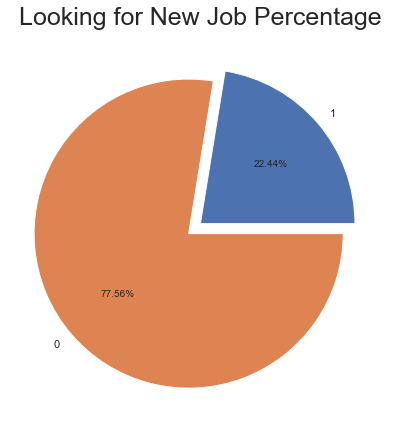

In [103]:
sizes = list(full_data['target'].value_counts().sort_values().values)
labels = list(full_data['target'].value_counts().sort_values().index)

explode = [0, 0.1]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, explode = explode,
        autopct=lambda p:f'{p:.2f}%')
plt.title('Looking for New Job Percentage', fontsize=25)
plt.tight_layout()
plt.show()

In [104]:
full_data.describe(include = 'object').T

,count,unique,top,freq
city,21287,123,103,4828
gender,16271,3,Male,14681
relevent_experience,21287,2,Has relevent experience,15316
enrolled_university,20870,3,no_enrollment,15336
education_level,20775,5,Graduate,12867
major_discipline,18162,6,STEM,16113
experience,21217,22,21,3669
company_size,14727,8,50-99,3421
company_type,14513,6,Pvt Ltd,10958
last_new_job,20824,6,1,8924


In [105]:
dataDesc= []

for i in full_data.columns:
    dataDesc.append([
        i, 
        full_data[i].dtypes,
        full_data[i].isna().sum(),
        round((((full_data[i].isna().sum()) / len(full_data)) * 100),2),
        full_data[i].nunique(),
        full_data[i].sample(20).drop_duplicates().values
    ])
pd.DataFrame(dataDesc, columns=[
    "Data features", 
    "Data types",
    "Null",
    "Null Percentage",
    "Unique",
        "Unique Sample"
])

,Data features,Data types,Null,Null Percentage,Unique,Unique Sample
0,enrollee_id,int64,0,0.00,21287,"[12166, 27061, 25051, 22718, 10388, 4526, 2802..."
1,city,object,0,0.00,123,"[101, 53, 16, 73, 102, 160, 165, 71, 103, 105,..."
2,city_development_index,float64,0,0.00,93,"[0.92, 0.624, 0.74, 0.55, 0.804, 0.698, 0.762,..."
3,gender,object,5016,23.56,3,"[Male, nan]"
4,relevent_experience,object,0,0.00,2,"[Has relevent experience, No relevent experience]"
5,enrolled_university,object,417,1.96,3,"[no_enrollment, Full time course, Part time co..."
6,education_level,object,512,2.41,5,"[Graduate, Masters, Phd, High School, Primary ..."
7,major_discipline,object,3125,14.68,6,"[Other, STEM, nan, Business Degree]"
8,experience,object,70,0.33,22,"[21, 3, 19, 2, 6, 5, 4, 11, 0, 14, 1, 7]"
9,company_size,object,6560,30.82,8,"[10/49, 50-99, 500-999, nan, <10, 100-500, 500..."


In [106]:
full_data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                       0
dtype: int64

In [107]:
for column in ['gender','enrolled_university','education_level',
               'major_discipline', 'experience', 'company_size', 
               'company_type','last_new_job']:
    full_data[column].fillna(full_data[column].mode()[0], inplace=True)

In [108]:
full_data.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [109]:
full_data[full_data.duplicated()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


In [110]:
full_data.duplicated().sum()

0

In [111]:
full_data.drop_duplicates(keep='first',inplace=True)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  21287 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     21287 non-null  object 
 6   education_level         21287 non-null  object 
 7   major_discipline        21287 non-null  object 
 8   experience              21287 non-null  object 
 9   company_size            21287 non-null  object 
 10  company_type            21287 non-null  object 
 11  last_new_job            21287 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  21287 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [112]:
full_data['city'] = full_data['city'].str.replace('city_','')

In [113]:
full_data['city'].value_counts()

103    4828
21     3020
16     1701
114    1491
160     958
       ... 
8         4
129       3
111       3
171       2
140       1
Name: city, Length: 123, dtype: int64

In [114]:
full_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,1,36,1
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0
2,11561,21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0
3,33241,115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,50-99,Pvt Ltd,0,52,1
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0


In [115]:
for col in full_data.columns:
    full_data[col] = enc.fit_transform(full_data[col])

NameError: name 'enc' is not defined

### EDA 

In [ ]:
label_dict = {"color":"k","fontsize":14} # x, y 
title_dict = {"color":"k","fontsize":17} # title

fig= plt.figure(figsize=(15,8)).suptitle("Data Spreads",fontsize=22)

sns.catplot(x="experience", kind="count", data=full_data, height=8, aspect=10/6,
            palette="husl", hue='target',
             order= [ '1','2','3','4', '5','6','7','8','9','10', '11','12','13','14','15','16','17','18','19','20','20'] )#, bins=70, ax=ax0)
plt.title('The extent to which years of experience influence the employee’s decision to stay or look for a new job', 
              fontdict=title_dict)
plt.xlabel('Experience', fontdict=label_dict)
plt.ylabel('Count', fontdict=label_dict)
plt.tight_layout()
#####################################
sns.catplot(x="education_level", kind="count", data=full_data, height=6, aspect=2, palette= "viridis",
            hue='target',order= ['Primary School','High School','Graduate','Masters','Phd'])
plt.title('The extent to which the educational level affects the decision to stay or search for a new job', 
              fontdict=title_dict)
plt.xlabel('Education_level', fontdict=label_dict)
plt.ylabel('Count', fontdict=label_dict);
#############################################
sns.catplot(x="major_discipline", kind="count", data=full_data, height=6, aspect=2, palette= "rocket",
            hue='target')
plt.title('Major discipline', 
              fontdict=title_dict)
plt.xlabel('Mmajor discipline', fontdict=label_dict)
plt.ylabel('Count', fontdict=label_dict);
####################################################3
sns.catplot(x="target", kind="count", data= full_data, height=6, aspect=2, palette="husl", hue="gender")
plt.title('Gender', fontdict=title_dict)
plt.xlabel('Target', fontdict=label_dict)
plt.ylabel('Count', fontdict=label_dict);

In [ ]:
index = full_data.dtypes[full_data.dtypes == object].index

In [ ]:
# Check for our data and hue by "target". Is our data linearly separable?
plt.figure(figsize=(15,4))
sns.pairplot(full_data, hue ='target')
plt.show();

In [ ]:
# Create x, y
X = full_data.drop(columns=['enrollee_id', 'target'])
y = full_data["target"]

In [ ]:
# Biild our faeteres list for cat. & numeric. 
my_list_numeric= x.select_dtypes(include=np.number).columns
my_list_cat = x.select_dtypes(exclude=np.number).columns
print(my_list_numeric, my_list_cat)

In [ ]:
# Dummy variabiles and label encoder.===> Useful in that it works ignore
X = pd.get_dummies(x, drop_first=True)
X 

In [ ]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, shuffle = True, random_state=42)

### Logistic Regression Classifier 



## Applying Machine learning models for predictions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
from matplotlib.colors import ListedColormap

from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from scipy.special import boxcox, inv_boxcox

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

warnings.simplefilter(action='ignore', category=FutureWarning)
 
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


# Pallets used for visualizations
color= "Spectral"
color_sns= sns.color_palette(color)
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'

In [131]:
print('baseline accuracy' )
y.value_counts()/len(y)

baseline accuracy


NameError: name 'y' is not defined

In [132]:
def model_metrics(model, kfold, X_train, X_test, y_train, y_test, df_test):
    
    model.fit(X_train, y_train)

    #metrics
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    # CODE HERE PLEASE
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    
    test_pred = model.predict(df_test)
    return test_pred

In [133]:
BOLD = '\033[1m'
END = '\033[0m'
kfold=5

In [134]:
def basic_classifiers (X_train, X_test, y_train, y_test, df_test):
    kfold = 5
    # Scaling 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    ##################################################################################  K Neighbors Classifier model
    
    print(); print(BOLD + 'K Neighbors Classifier Model:' + END)
    knn = KNeighborsClassifier()
    knn_pred = model_metrics(knn, kfold, X_train, X_test, y_train, y_test, df_test)
    
    
    ################################################################################## Logistic Regression
    
    print(); print(BOLD + 'Logistic Regression Model:' + END)
    logistic_regression = LogisticRegression()
    lg_pred = model_metrics(logistic_regression, kfold, X_train, X_test, y_train, y_test, df_test)
    
    
    ######################################################################################## Decision Tree
    
    print(); print(BOLD + 'Decision Tree Classifier Model:' + END)
    decision_tree = DecisionTreeClassifier()
    dt_pred = model_metrics(decision_tree, kfold, X_train, X_test, y_train, y_test, df_test)
    
    
    #################################################################################### Random Forest Classifier
    print(); print(BOLD + 'Random Forest Classifier Model:' + END)
    random_forest = RandomForestClassifier()

    rf_pred = model_metrics(random_forest, kfold, X_train, X_test, y_train, y_test, df_test)
    
    
    ################################################################################### Extra Trees Classifier
    print(); print(BOLD + 'Extra Trees Classifier Model:' + END)
    extra_trees = ExtraTreesClassifier()

    et_pred = model_metrics(extra_trees, kfold, X_train, X_test, y_train, y_test, df_test)
    
    
    ####################################################################################### AdaBoost Classifier
    print(); print(BOLD + 'AdaBoost Classifier Model:' + END)
    ada_boost = AdaBoostClassifier()

    ab_pred = model_metrics(ada_boost, kfold, X_train, X_test, y_train, y_test, df_test)
    
    
    ######################################################################################## SVC Classifier
    print(); print(BOLD + 'SVC Classifier Model:' + END)
    svc = SVC()

    svc_pred = model_metrics(svc, kfold, X_train, X_test, y_train, y_test, df_test)

In [118]:
basic_classifiers( X_train, X_test, y_train, y_test, df_test)

NameError: name 'X_train' is not defined

In [119]:
def RandomForest_GridSearch(X_train, X_test, y_train, y_test, df_test):
    print(); print(BOLD + 'Grid Search with Random Forest Classifier Model:' + END)
    kfold=5
    rf_params = {
        #'n_estimators': [10, 50, 100, 150, 200, 250],
        'max_features':[2, 3, 5, 7, 8],
        #'max_depth': [1, 2, 3, 4, 5, 8],
        #'criterion':['gini', 'entropy'],
    }

    random_forest = RandomForestClassifier(n_estimators=100)
    gs = GridSearchCV(random_forest, param_grid=rf_params, cv=5, verbose = 1)
    gs_pred = model_metrics(gs, kfold, X_train, X_test, y_train, y_test, df_test)
    
    return gs.best_estimator_

In [120]:
rf_gs_best_estimator = RandomForest_GridSearch(X_train, X_test, y_train, y_test, df_test)

NameError: name 'X_train' is not defined

In [121]:
def ExtraTrees_GridSearch(X_train, X_test, y_train, y_test, df_test):
    print(); print(BOLD + 'Grid Search with Extra Trees Model:' + END)
    # Scaling 
    
    
    kfold=5
    rf_params = {
        #'n_estimators': [10, 100, 400, 800, 1100, 1850],
        #'max_features':['auto'],
        'max_depth': [1, 2, 3, 4, 5, 8],
        #'criterion':['gini'],
    }

    extra_trees = ExtraTreesClassifier(n_estimators=100)    
    gs = GridSearchCV(extra_trees, param_grid=rf_params, cv=5, verbose = 1)
    gs_pred = model_metrics(gs, kfold, X_train, X_test, y_train, y_test, df_test)
    
    return gs.best_estimator_

In [122]:
et_gs_best_estimator = ExtraTrees_GridSearch(X_train, X_test, y_train, y_test, df_test)

NameError: name 'X_train' is not defined

In [123]:
# second best model 
et_gs_best_estimator

NameError: name 'et_gs_best_estimator' is not defined

In [124]:
def Best_Score_model (X_train, X_test, y_train, y_test, df_test):
    print(); print(BOLD + 'Best Score Model (RandomForestClassifier):' + END)
    opt_model = RandomForestClassifier(criterion='gini',n_estimators=1850,
                                        max_depth=7,min_samples_split=6,
                                        min_samples_leaf=6, max_features='auto',
                                        oob_score=True, random_state=42,
                                        n_jobs=-1, verbose=1)
                                 

    opt_pred = model_metrics(opt_model, kfold, X_train, X_test, y_train, y_test, df_test)


In [125]:
Best_Score_model (X_train, X_test, y_train, y_test, test_df)

NameError: name 'X_train' is not defined

In [126]:
import pandas as pd
full_data.groupby(['education_level','gender'])['target'].sum()
full_data.groupby()

TypeError: You have to supply one of 'by' and 'level'

In [127]:
full_data.groupedby = full_data.groupby('education_level')

<ipython-input-127-b20b67d95797>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  full_data.groupedby = full_data.groupby('education_level')


In [128]:
groupedby

NameError: name 'groupedby' is not defined

In [129]:
type(grouped_by_classes)

NameError: name 'grouped_by_classes' is not defined

In [130]:
full_data['education_level'].head()

0    Graduate
1    Graduate
2    Graduate
3    Graduate
4     Masters
Name: education_level, dtype: object